In [1]:
## -------- Import the necessary libraries -------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from pandas_datareader import data as web
import datetime

In [2]:
list_of_tickers = si.tickers_sp500()
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2021,4,30)

p = pdr.DataReader(list_of_tickers, 'yahoo', start, end)
#p = pd.read_csv('SMA-Breakeout-2017-2021-1.csv', low_memory=False)  

C:\Users\Anton\anaconda\lib\site-packages\yahoo_fin\stock_info.py:130: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500["Symbol"] = sp500["Symbol"].str.replace(".", "-")


In [3]:
p

Attributes   Adj Close                                                 \
Symbols              A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2017-01-03   44.832710  44.741226  168.162827   27.413372   50.757782   
2017-01-04   45.420956  45.127758  169.542786   27.382690   51.473480   
2017-01-05   44.880924  44.345032  169.424500   27.521944   51.863861   
2017-01-06   46.279240  44.654255  167.206650   27.828764   51.880135   
2017-01-09   46.423897  45.494972  167.108093   28.083660   52.221714   
...                ...        ...         ...         ...         ...   
2021-04-26  137.339996  22.040001  197.139999  134.491562  111.389999   
2021-04-27  136.479996  21.760000  197.279999  134.162109  111.440002   
2021-04-28  134.800003  21.700001  197.630005  133.353485  111.930000   
2021-04-29  134.149994  21.299999  200.679993  133.253662  110.889999   
2021-04-30  133.639999  21.719999  200.160004  131.237091  111.500000   

Attributes                                                              ...  \
Symbols            ABC        ABMD         ABT         ACN        ADBE  ...   
Date                                                                    ...   
2017-01-03   76.308624  112.360001   36.016212  108.282211  103.480003  ...   
2017-01-04   78.202255  115.739998   36.302132  108.542549  104.139999  ...   
2017-01-05   77.297005  114.809998   36.615711  106.915443  105.910004  ...   
2017-01-06   78.331573  115.419998   37.611813  108.133453  108.300003  ...   
2017-01-09   78.959724  117.110001   37.574924  106.924728  108.570000  ...   
...                ...         ...         ...         ...         ...  ...   
2021-04-26  119.289009  348.200012  122.580002  289.519989  515.700012  ...   
2021-04-27  118.362434  340.630005  121.699997  290.250000  517.320007  ...   
2021-04-28  118.890480  351.170013  121.449997  290.269989  515.479980  ...   
2021-04-29  120.803406  322.940002  121.010002  292.540009  516.090027  ...   
2021-04-30  120.355064  320.730011  120.080002  289.970001  508.339996  ...   

Attributes     Volume                                                          \
Symbols           XEL       XLNX         XOM       XRAY        XYL        YUM   
Date                                                                            
2017-01-03  2065100.0  4127000.0  10360600.0  1778000.0  1596700.0  4793400.0   
2017-01-04  2542600.0  3281700.0   9434200.0   978300.0  1703000.0  2835200.0   
2017-01-05  2611900.0  2198000.0  14443200.0  1114500.0  1846000.0  4040000.0   
2017-01-06  1707400.0  2381800.0  16518100.0  1169600.0  1561600.0  2863800.0   
2017-01-09  1840100.0  3551600.0  13762300.0   950600.0  1090400.0  1944200.0   
...               ...        ...         ...        ...        ...        ...   
2021-04-26  2361200.0  1486200.0  16083800.0  1483600.0   510300.0  2121100.0   
2021-04-27  2159400.0  1898900.0  19278600.0  1545800.0   542900.0  1082000.0   
2021-04-28  2209600.0  2312300.0  24729800.0  1904700.0   465700.0  1789700.0   
2021-04-29  1915300.0  2005000.0  27318400.0  4085900.0   544900.0  2055800.0   
2021-04-30  2633500.0  4901800.0  30518400.0  2177300.0   773400.0  1863900.0   

Attributes                                             
Symbols           ZBH      ZBRA       ZION        ZTS  
Date                                                   
2017-01-03  1381100.0  388200.0  2896200.0  3579700.0  
2017-01-04  1502800.0  463200.0  1907500.0  3316300.0  
2017-01-05  1453900.0  486600.0  2106000.0  2469100.0  
2017-01-06  1821000.0  308300.0  2149100.0  2845800.0  
2017-01-09  1163300.0  263300.0  2104900.0  2123300.0  
...               ...       ...        ...        ...  
2021-04-26   821000.0  216900.0  1228700.0   980500.0  
2021-04-27   819500.0  138800.0  1391800.0  1323100.0  
2021-04-28   977300.0  199700.0  1113700.0  1394600.0  
2021-04-29   896000.0  168500.0  1232100.0  1686200.0  
2021-04

In [4]:
# p.to_csv('SMA-Breakeout-2017-2021-0.csv')

In [5]:
data_pc = p.pct_change()

In [6]:
data_pc = pd.DataFrame(data_pc["Close"])

In [7]:
# Calculate the standard deviation
# data_std = np.std(p, axis = 0)
data_std = data_pc.loc['2020-01-01':'2020-12-31'].std()*(252**0.5)*100
data_std.head()

Symbols
A        36.524330
AAL     104.146856
AAP      46.428629
AAPL     46.658571
ABBV     34.743073
dtype: float64

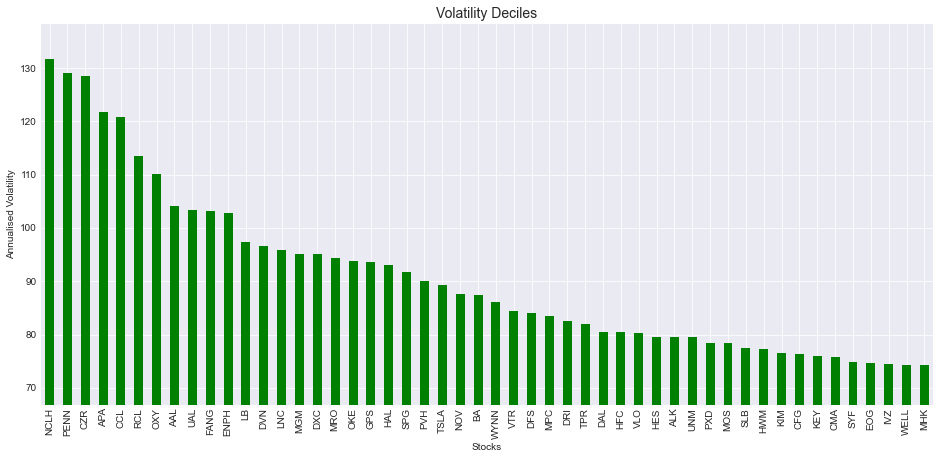

In [8]:
vol_sorted = data_std.sort_values(ascending=False)
top_decile = vol_sorted[:int(len(data_std)*0.1)]
top_decile.plot.bar(figsize=(16,7),color='green',ylim=top_decile.min()*0.9)
plt.title('Volatility Deciles', fontsize=14)
plt.xlabel('Stocks')
plt.ylabel('Annualised Volatility')
plt.show()

In [9]:
data_pc

Symbols,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.013121,0.008639,0.008206,-0.001119,0.014100,0.024815,0.030082,0.007939,0.002404,0.006378,...,0.004431,-0.007280,-0.011002,0.008188,0.014904,0.003639,0.009194,0.009043,0.014358,0.009703
2017-01-05,-0.011890,-0.017345,-0.000698,0.005085,0.007584,-0.011576,-0.008035,0.008638,-0.014991,0.016996,...,0.000000,-0.012108,-0.014907,-0.013029,-0.009129,0.003310,0.006425,-0.026198,-0.016210,-0.003327
2017-01-06,0.031156,0.006973,-0.013091,0.011148,0.000314,0.013384,0.005313,0.027204,0.011392,0.022566,...,0.002941,0.019334,-0.000565,-0.000686,-0.007010,0.012097,0.000095,0.014277,0.006498,0.003152
2017-01-09,0.003126,0.018827,-0.000590,0.009159,0.006584,0.008019,0.014642,-0.000981,-0.011178,0.002493,...,-0.015151,0.000169,-0.016497,0.003088,-0.004236,0.002794,0.019436,0.000116,-0.010837,-0.002773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,0.004829,0.044055,-0.013066,0.002978,0.000090,-0.015783,-0.008062,-0.005920,-0.007610,-0.000271,...,-0.006753,0.033164,0.001979,0.001662,-0.000362,-0.017329,-0.010697,0.002191,0.006265,-0.004339
2021-04-27,-0.006262,-0.012704,0.000710,-0.002450,0.000449,-0.007767,-0.021740,-0.007179,0.002521,0.003141,...,-0.008499,-0.002613,0.013111,-0.000754,0.008330,0.006311,0.003585,0.006520,0.009888,-0.000294
2021-04-28,-0.012309,-0.002757,0.001774,-0.006027,0.004397,0.004461,0.030943,-0.002054,0.000069,-0.003557,...,-0.002714,-0.015643,0.030137,-0.007093,-0.000898,0.009965,0.012192,-0.010264,0.001813,0.011605


In [27]:
vol_sorted

Symbols
NCLH    131.648939
PENN    129.010503
CZR     128.518762
APA     121.714919
CCL     120.818809
           ...    
JNJ      30.381680
HRL      30.127403
BMY      29.628811
COST     29.142532
VZ       24.692761
Length: 505, dtype: float64

In [28]:
stock_data

Symbols,NCLH,PENN,CZR,APA,CCL,RCL,OXY,AAL,UAL,FANG,...,HWM,KIM,CFG,KEY,CMA,SYF,EOG,IVZ,WELL,MHK
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,54.959999,30.740000,31.650000,44.299999,66.750000,120.379997,73.980003,52.990002,68.940002,127.879997,...,27.760000,18.120001,42.680000,20.170000,86.570000,38.860001,109.300003,36.349998,64.029999,276.000000
2018-01-03,55.369999,30.330000,31.299999,45.330002,66.900002,123.580002,75.000000,52.340000,68.489998,129.169998,...,27.980000,18.000000,43.169998,20.240000,86.540001,39.119999,110.930000,36.529999,64.139999,275.140015
2018-01-04,54.680000,30.309999,32.000000,46.840000,66.849998,122.459999,74.959999,52.669998,69.260002,130.130005,...,29.320000,17.680000,43.680000,20.320000,87.510002,39.400002,110.949997,36.830002,62.759998,275.260010
2018-01-05,54.869999,30.790001,31.799999,46.389999,66.300003,121.230003,74.550003,52.650002,69.360001,129.979996,...,29.610001,17.700001,43.880001,20.330000,88.470001,39.740002,112.169998,37.279999,62.369999,276.670013
2018-01-08,54.660000,30.790001,31.700001,45.919998,66.050003,121.089996,75.190002,52.130001,68.510002,130.990005,...,29.760000,17.799999,44.060001,20.280001,88.720001,39.259998,112.709999,36.840000,62.590000,279.149994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-24,56.110001,26.719999,40.099998,40.639999,65.540001,117.269997,77.339996,45.689999,68.949997,125.730003,...,21.980000,13.310000,42.270000,20.070000,96.269997,34.349998,114.589996,30.650000,51.020000,227.250000
2018-04-25,56.380001,26.260000,39.450001,41.000000,66.070000,118.489998,77.360001,45.250000,68.510002,125.750000,...,22.150000,13.240000,42.520000,20.230000,96.070000,33.290001,115.400002,30.740000,50.520000,227.119995
2018-04-26,55.049999,29.650000,40.250000,40.880001,64.309998,112.930000,77.599998,42.369999,66.620003,126.870003,...,22.240000,14.070000,41.980000,20.290001,95.699997,33.299999,117.620003,29.850000,50.009998,227.199997


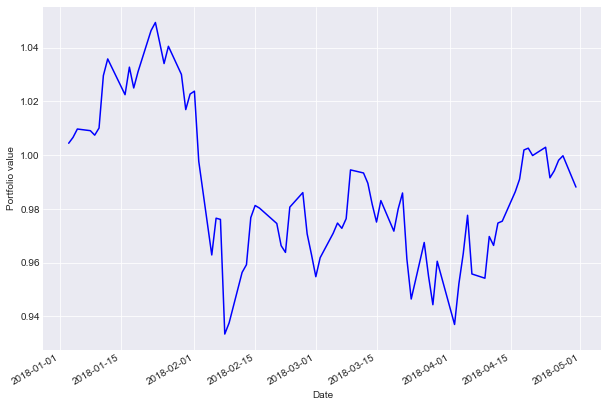

In [10]:
data = pd.DataFrame(p["Close"])
# Retrieve data in stock_list from 2019 January onwards
stock_data = data.loc['2018-1':'2018-4',top_decile.index]
# Calculate the daily percentage change of prices
stock_data_pc = stock_data.pct_change()
# Create a new dataframe called portfolio
portfolio = pd.DataFrame()
# Calculate the average returns of stocks
portfolio['returns'] = stock_data_pc.mean(axis=1)
# Calculate cumulative returns of portfolio
portfolio['value'] = (portfolio+1).cumprod()
# Drop any rows with nan values
portfolio = portfolio.dropna()
portfolio.value.plot(color='b',figsize=(10,7))
plt.ylabel("Portfolio value")
plt.show()

In [11]:
#data.to_csv('SMA-Breakeout-2017-2021-1.csv') 
#data_pc.to_csv('SMA-Breakeout-2017-2021-2.csv') 

In [12]:
portfolio['value'].head()

Date
2018-01-03    1.004429
2018-01-04    1.006600
2018-01-05    1.009720
2018-01-08    1.009101
2018-01-09    1.007439
Name: value, dtype: float64

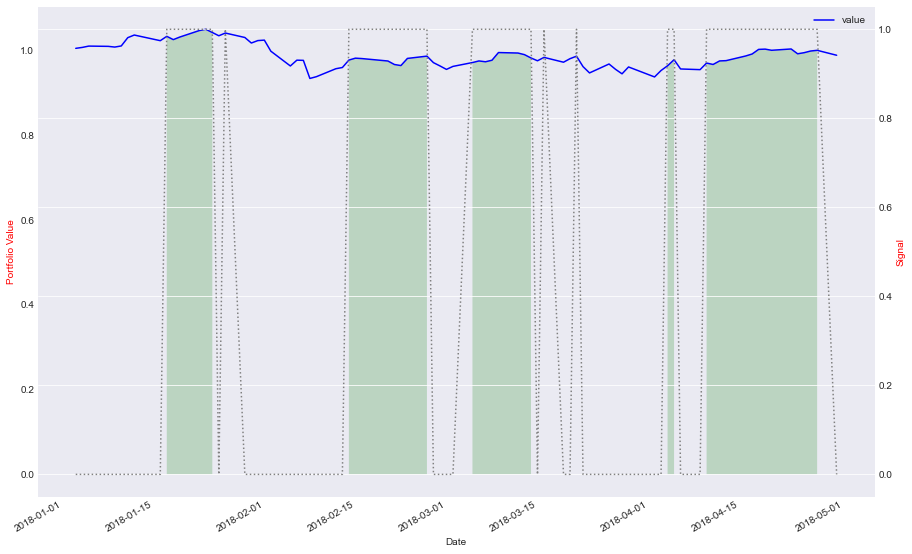

In [13]:
def get_strategy_returns_sma(portfolio):
    # Calculate the simple moving average of period 10
    portfolio['sma10'] = portfolio.value.rolling(window=10).mean()
    # Create a trading signal
    portfolio['signal'] = np.where(portfolio.value > portfolio.sma10,1,0)
    # Calculate the strategy returns
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

def plot_signal(portfolio):
    portfolio['value'].plot(color='blue')    
    plt.fill_between(portfolio.index, portfolio.value, where=(portfolio.signal==1), facecolor='g', alpha=0.2)      
    plt.legend()
    plt.ylabel('Portfolio Value',color='r')
    # Plot the signal values    
    portfolio['signal'].plot(secondary_y=True,figsize=(15,10),color='grey', linestyle='dotted')
    plt.ylabel('Signal',color='r')
    plt.show()

portfolio = get_strategy_returns_sma(portfolio)    
plot_signal(portfolio)   

The Sharpe ratio is -0.99 


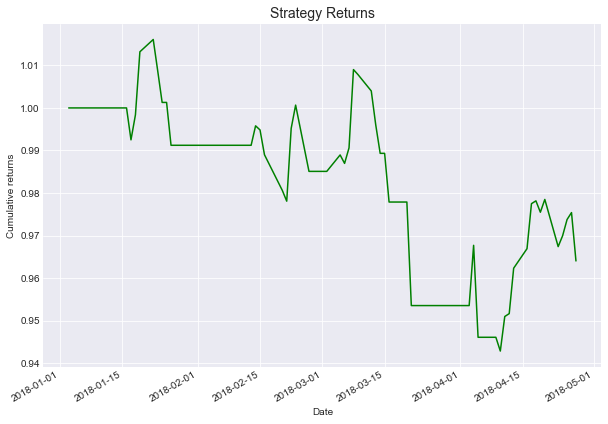

The maximum drawdown is -7.21


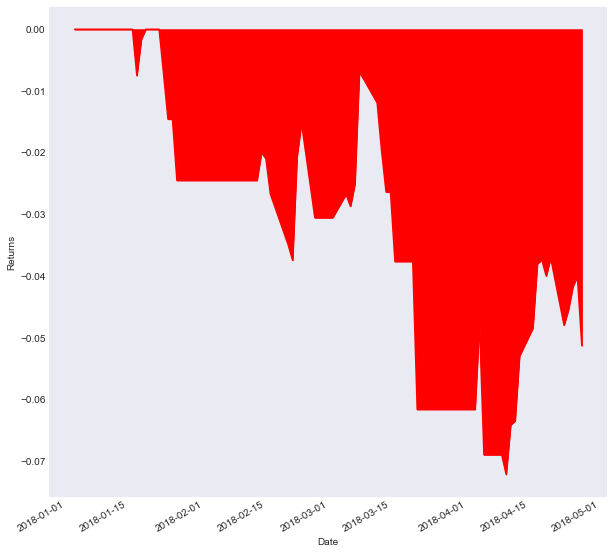

In [14]:
# Plot the portfolio returns
def plot_returns_dd(portfolio):
    # ----------- Sharpe ratio ------------------
    sharpe_ratio = np.mean(portfolio.str_returns)/np.std(portfolio.str_returns)*(252**0.5)
    print('The Sharpe ratio is %.2f ' % sharpe_ratio)

    # ----------- Cumulative strategy returns ------------------
    portfolio['cum_str_returns'] = (portfolio['str_returns']+1).cumprod()
    # Plot the cumulative strategy returns
    portfolio['cum_str_returns'].plot(figsize=(10,7), color='green')
    plt.title('Strategy Returns', fontsize=14)
    plt.ylabel('Cumulative returns')
    plt.show()        

    # ----------- Drawdown ------------------    
    # Calculate the running maximum
    running_max = np.maximum.accumulate(portfolio['cum_str_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (portfolio['cum_str_returns'])/running_max - 1
    max_dd = drawdown.min()*100
    print('The maximum drawdown is %.2f' % max_dd)
    # Plot the drawdowns
    drawdown.plot(color='r',figsize=(10,10))
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()    
    
plot_returns_dd(portfolio)   

In [32]:

cumulative_return= (portfolio['cum_str_returns'][-2] - 1) * 100
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))
portfolio['cum_str_returns'] 

cumulative_return = -3.53%


Date
2018-01-03    1.000000
2018-01-04    1.000000
2018-01-05    1.000000
2018-01-08    1.000000
2018-01-09    1.000000
                ...   
2018-04-24    0.974468
2018-04-25    0.974468
2018-04-26    0.976101
2018-04-27    0.964722
2018-04-30         NaN
Name: cum_str_returns, Length: 81, dtype: float64

In [16]:
portfolio

,returns,value,sma10,signal,str_returns,cum_str_returns
Date,,,,,,
2018-01-03,0.004429,1.004429,NaN,0,0.000000,1.000000
2018-01-04,0.002162,1.006600,NaN,0,0.000000,1.000000
2018-01-05,0.003100,1.009720,NaN,0,-0.000000,1.000000
2018-01-08,-0.000613,1.009101,NaN,0,-0.000000,1.000000
2018-01-09,-0.001647,1.007439,NaN,0,0.000000,1.000000
...,...,...,...,...,...,...
2018-04-24,-0.011334,0.991574,0.989292,1,0.002641,0.969956
2018-04-25,0.002641,0.994193,0.992070,1,0.003931,0.973770
2018-04-26,0.003931,0.998101,0.994407,1,0.001675,0.975401


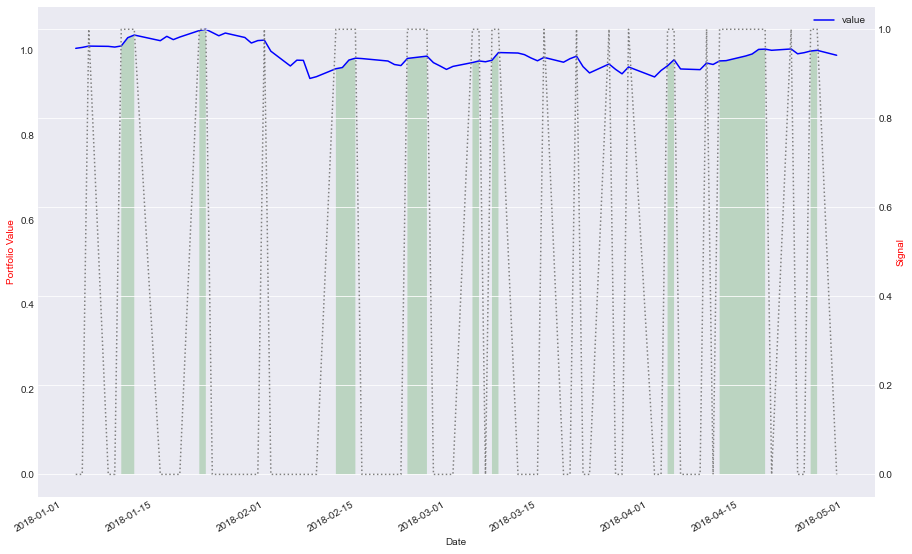

The Sharpe ratio is -1.61 


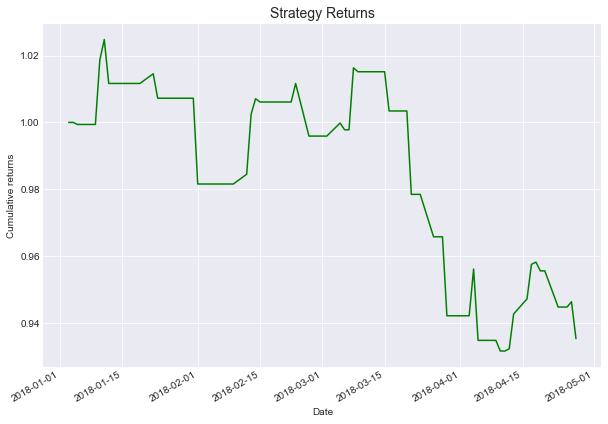

The maximum drawdown is -9.10


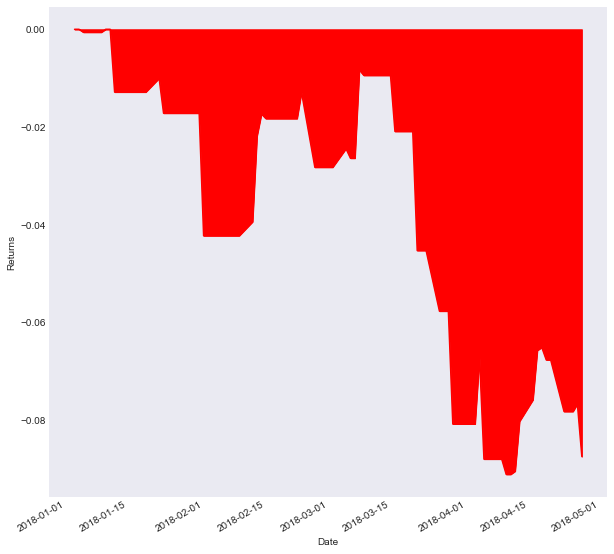

In [17]:
def get_strategy_returns_breakout(portfolio):
    # Calculate the breakout indicator values
    portfolio['high'] = portfolio.value.rolling(window=3).max()
    # Create a trading signal
    portfolio['signal'] = np.where(portfolio.value>=portfolio.high,1,0)
    # Calculate the strategy returns
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_breakout(portfolio)
plot_signal(portfolio)    
plot_returns_dd(portfolio)

In [18]:
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

cumulative_return = -6.47%


In [19]:
portfolio.tail(20)

,returns,value,sma10,signal,str_returns,cum_str_returns,high
Date,,,,,,,
2018-04-03,0.016189,0.952172,0.959032,0,0.000000,0.942090,0.960531
2018-04-04,0.011713,0.963325,0.957361,1,0.014850,0.956080,0.963325
2018-04-05,0.014850,0.977630,0.956532,1,-0.022336,0.934725,0.977630
2018-04-06,-0.022336,0.955794,0.955973,0,-0.000000,0.934725,0.977630
2018-04-09,-0.001656,0.954211,0.956747,0,0.000000,0.934725,0.977630
2018-04-10,0.016263,0.969730,0.956969,1,-0.003420,0.931528,0.969730
2018-04-11,-0.003420,0.966413,0.958117,0,0.000000,0.931528,0.969730
2018-04-12,0.008612,0.974736,0.961154,1,0.000714,0.932194,0.974736
2018-04-13,0.000714,0.975432,0.962644,1,0.011218,0.942651,0.975432


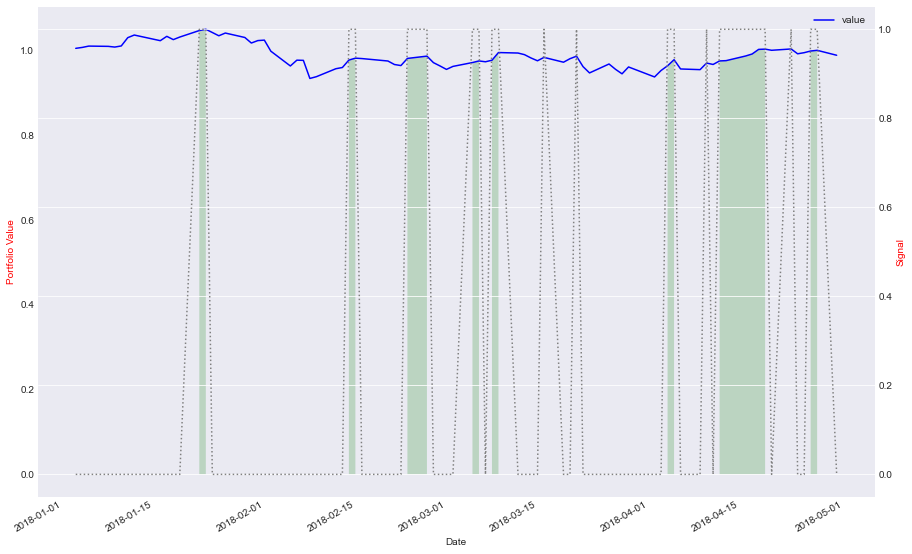

The Sharpe ratio is -1.17 


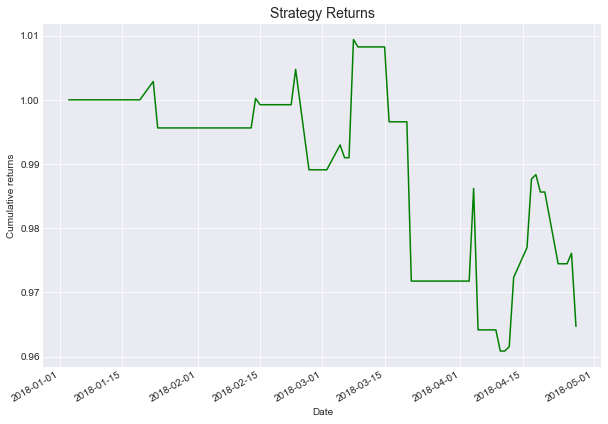

The maximum drawdown is -4.81


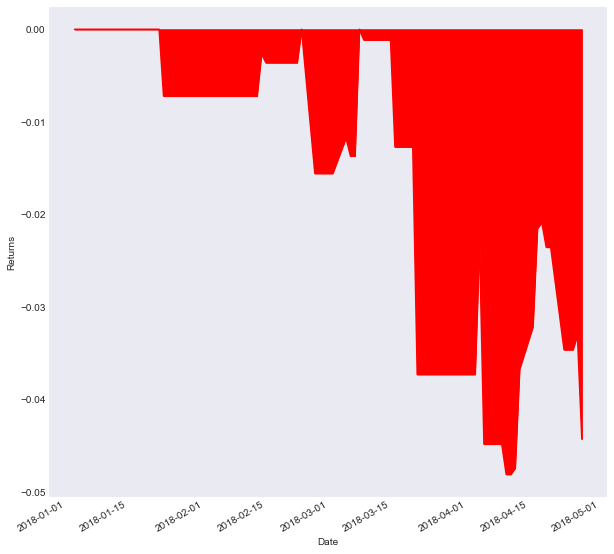

In [20]:
def get_strategy_returns_sma_breakout(portfolio):
    # Calculate the simple moving average 
    sma10 = portfolio.value > portfolio.value.rolling(window=10).mean()
    # Calculate the breakout indicator values
    breakout = portfolio.value>=portfolio.value.rolling(window=3).max()

    # Create a trading signal
    portfolio['signal'] = np.where(sma10 & breakout,1,0)

    # Calculate the strategy returns
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_sma_breakout(portfolio)
plot_signal(portfolio)    
plot_returns_dd(portfolio)   

In [21]:
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

cumulative_return = -3.53%


In [22]:
# df_portfolio = pd.DataFrame(portfolio)
# cumulative_return = (df_portfolio["value"][-1] - df_portfolio["value"][0])
# print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

In [23]:
from nsepy import get_history
from nsepython import *
import logging
urllib3_logger = logging.getLogger('urllib3')
urllib3_logger.setLevel(logging.CRITICAL)

ModuleNotFoundError: No module named 'nsepy'

In [ ]:
list_of_tickers = ["AGHOL.IS", "TURSG.IS", "AKBNK.IS", "AKCNS.IS", "AKSGY.IS", "AKSA.IS", "AKSEN.IS", "ALGYO.IS", "ALARK.IS", "ALBRK.IS", "ALCTL.IS", "ALKIM.IS", "AEFES.IS", "ARCLK.IS", "ARDYZ.IS", "ASELS.IS", "AYGAZ.IS", "BAGFS.IS", "BIMAS.IS", "BIZIM.IS", "BRSAN.IS", "BRISA.IS", "BUCIM.IS", "CLEBI.IS", "CEMTS.IS", "CIMSA.IS", "CCOLA.IS", "DEVA.IS", "DOHOL.IS", "DOAS.IS", "EGEEN.IS", "EKGYO.IS", "ENJSA.IS", "ENKAI.IS", "EREGL.IS", "FROTO.IS", "GARAN.IS", "GOODY.IS", "GOZDE.IS", "GSDHO.IS", "GUBRF.IS", "HALKB.IS", "HEKTS.IS", "INDES.IS", "IPEKE.IS", "ISFIN.IS", "ISGYO.IS", "ISMEN.IS", "ISDMR.IS", "KRDMD.IS", "KAREL.IS", "KARTN.IS", "KERVT.IS", "KCHOL.IS", "KORDS.IS", "KOZAL.IS", "KOZAA.IS", "LOGO.IS", "MAVI.IS", "MGROS.IS", "MPARK.IS", "NTHOL.IS", "NETAS.IS", "ODAS.IS", "OTKAR.IS", "OYAKC.IS", "OZKGY.IS", "PGSUS.IS", "PETKM.IS", "PETUN.IS", "PNSUT.IS", "SAHOL.IS", "SASA.IS", "SKBNK.IS", "SELEC.IS", "SISE.IS", "SOKM.IS", "TATGD.IS", "TAVHL.IS", "TKFEN.IS", "THYAO.IS", "TOASO.IS", "TRGYO.IS", "TSKB.IS", "TMSN.IS", "TUPRS.IS", "TTKOM.IS", "TTRAK.IS", "TKC", "THBIY", "ISCTR.IS", "TURSG.IS", "ULKER.IS", "VAKBN.IS", "VESTL.IS", "YKBNK.IS", "YATAS.IS", "ZOREN.IS"]
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2021,4,30)

f = pdr.DataReader(list_of_tickers, 'yahoo', start, end)

In [ ]:
f

In [ ]:
data_pc = f.pct_change()

In [ ]:
data_pc = pd.DataFrame(data_pc["Close"])

In [ ]:
# Calculate the standard deviation
# data_std = np.std(p, axis = 0)
data_std = data_pc.loc['2010-01-01':'2010-12-31'].std()*(252**0.5)*100
data_std.head()

In [ ]:
vol_sorted = data_std.sort_values(ascending=False)
#top_decile = vol_sorted[:int(len(data_std)*0.1)]
#top_decile.plot.bar(figsize=(16,7),color='green',ylim=top_decile.min()*0.9)

top_decile = vol_sorted[:int(len(data_std)*0.5)]
top_decile.plot.bar(figsize=(16,7),color='green',ylim=top_decile.min())


plt.title('Volatility Deciles', fontsize=14)
plt.xlabel('Stocks')
plt.ylabel('Annualised Volatility')
plt.show()

In [ ]:
data = pd.DataFrame(f["Close"])
# Retrieve data in stock_list from 2019 January onwards
stock_data = data.loc['2010-1':'2010-12',top_decile.index]
# Calculate the daily percentage change of prices
stock_data_pc = stock_data.pct_change()
# Create a new dataframe called portfolio
portfolio = pd.DataFrame()
# Calculate the average returns of stocks
portfolio['returns'] = stock_data_pc.mean(axis=1)
# Calculate cumulative returns of portfolio
portfolio['value'] = (portfolio+1).cumprod()
# Drop any rows with nan values
portfolio = portfolio.dropna()
portfolio.value.plot(color='b',figsize=(10,7))
plt.ylabel("Portfolio value")
plt.show()

In [ ]:
def get_strategy_returns_sma(portfolio):
    # Calculate the simple moving average of period 10
    portfolio['sma10'] = portfolio.value.rolling(window=10).mean()
    # Create a trading signal
    portfolio['signal'] = np.where(portfolio.value > portfolio.sma10,1,0)
    # Calculate the strategy returns
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

def plot_signal(portfolio):
    portfolio['value'].plot(color='blue')    
    plt.fill_between(portfolio.index, portfolio.value, where=(portfolio.signal==1), facecolor='g', alpha=0.2)      
    plt.legend()
    plt.ylabel('Portfolio Value',color='r')
    # Plot the signal values    
    portfolio['signal'].plot(secondary_y=True,figsize=(15,10),color='grey', linestyle='dotted')
    plt.ylabel('Signal',color='r')
    plt.show()

portfolio = get_strategy_returns_sma(portfolio)    
plot_signal(portfolio)   

In [ ]:
# Plot the portfolio returns
def plot_returns_dd(portfolio):
    # ----------- Sharpe ratio ------------------
    sharpe_ratio = np.mean(portfolio.str_returns)/np.std(portfolio.str_returns)*(252**0.5)
    print('The Sharpe ratio is %.2f ' % sharpe_ratio)

    # ----------- Cumulative strategy returns ------------------
    portfolio['cum_str_returns'] = (portfolio['str_returns']+1).cumprod()
    # Plot the cumulative strategy returns
    portfolio['cum_str_returns'].plot(figsize=(10,7), color='green')
    plt.title('Strategy Returns', fontsize=14)
    plt.ylabel('Cumulative returns')
    plt.show()        

    # ----------- Drawdown ------------------    
    # Calculate the running maximum
    running_max = np.maximum.accumulate(portfolio['cum_str_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (portfolio['cum_str_returns'])/running_max - 1
    max_dd = drawdown.min()*100
    print('The maximum drawdown is %.2f' % max_dd)
    # Plot the drawdowns
    drawdown.plot(color='r',figsize=(10,10))
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()    
    
plot_returns_dd(portfolio)   

In [ ]:
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

In [ ]:
def get_strategy_returns_breakout(portfolio):
    # Calculate the breakout indicator values
    portfolio['high'] = portfolio.value.rolling(window=3).max()
    # Create a trading signal
    portfolio['signal'] = np.where(portfolio.value>=portfolio.high,1,0)
    # Calculate the strategy returns
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_breakout(portfolio)
plot_signal(portfolio)    
plot_returns_dd(portfolio)

In [ ]:
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

In [ ]:
def get_strategy_returns_sma_breakout(portfolio):
    # Calculate the simple moving average 
    sma10 = portfolio.value > portfolio.value.rolling(window=10).mean()
    # Calculate the breakout indicator values
    breakout = portfolio.value>=portfolio.value.rolling(window=3).max()

    # Create a trading signal
    portfolio['signal'] = np.where(sma10 & breakout,1,0)

    # Calculate the strategy returns
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

portfolio = get_strategy_returns_sma_breakout(portfolio)
plot_signal(portfolio)    
plot_returns_dd(portfolio)   

In [ ]:
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

In [ ]:
#df1 = pd.read_csv("vsdgfbsfgb")

In [ ]:
#df2 = pd.read_csv("tnfhgmjgm")

In [ ]:
#df3 = df2.join(df1)

In [ ]:
#df3 = df3.set_index(['TRADEDATE'])
#df3

In [ ]:
portfolio

In [ ]:
top_decile

In [ ]:
stock_data